# Linear Regression And Residuals

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Load the diabeties dataset
diabetes = load_diabetes()

# Convert data to a pandas dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target of the prediction (diabeties progression a year later)
df['target'] = diabetes.target

print(min(df['target']), max(df['target']))

# Grab the head
df.head()


25.0 346.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
# Split data into X (features, e.g.: age, sex, ...) and Y (target)
# By convension X is uppercase and y is lowercase
X = df.drop('target', axis=1)  # features
y = df['target']  # target
X.shape, y.shape  # (rows, columns)


((442, 10), (442,))

In [3]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
# test_size=0.2: 80% goes to training, 20% goes to testing
# random_state: using the same number, you get the same randomization = same numbers
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Print out the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)  # 80%
print("Testing set shape:", X_test.shape, y_test.shape)  # 20%


Training set shape: (353, 10) (353,)
Testing set shape: (89, 10) (89,)


In [4]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression Model
lr = LinearRegression()
lr


LinearRegression()

In [5]:
# Train the model on the training set - this is how the model learns
lr.fit(X_train, y_train)


LinearRegression()

In [6]:
# Predict on the testing set

# y_pred are predicted values of the target variable based on the features
# Once we have these predictions, we can compare them to the actual values of the target variable
# We do that to evaluate the performance of the model
y_pred = lr.predict(X_test)
y_pred, y_pred.shape


(array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
        123.78965872,  92.1723465 , 258.23238899, 181.33732057,
         90.22411311, 108.63375858,  94.13865744, 168.43486358,
         53.5047888 , 206.63081659, 100.12925869, 130.66657085,
        219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
        207.35050182,  88.48340941,  70.43285917, 188.95914235,
        154.8868162 , 159.36170122, 188.31263363, 180.39094033,
         47.99046561, 108.97453871, 174.77897633,  86.36406656,
        132.95761215, 184.53819483, 173.83220911, 190.35858492,
        124.4156176 , 119.65110656, 147.95168682,  59.05405241,
         71.62331856, 107.68284704, 165.45365458, 155.00975931,
        171.04799096,  61.45761356,  71.66672581, 114.96732206,
         51.57975523, 167.57599528, 152.52291955,  62.95568515,
        103.49741722, 109.20751489, 175.64118426, 154.60296242,
         94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
        187.93203995, 206.49337474, 140.

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the performance of the model

# Variance of the dependant variable (target) explained by the independant variables (features)
# How well the model fits the data . Higher is better
r2 = r2_score(y_test, y_pred)

# MSE: Aveeage Squared distance between the predicted and the actual values on the y-axis . lower is better.
mse = mean_squared_error(y_test, y_pred)

# MAE: Average absoliute distance between predicted and the actual values on the y-axis . lower is bett
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

# Intercept: starting point of the regression line on the y-axis
# Value of the dependant variables (target) when the independant variables (features) are zero. 
# If positive number, increases as features increase, if negative, it's the opposite.
intercept = lr.intercept_

print('R2 score:', r2)
print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('Intercept:', intercept)


R2 score: 0.4526027629719197
Mean squared error: 2900.19362849348
Mean absolute error: 42.79409467959994
Intercept: 151.34560453985995


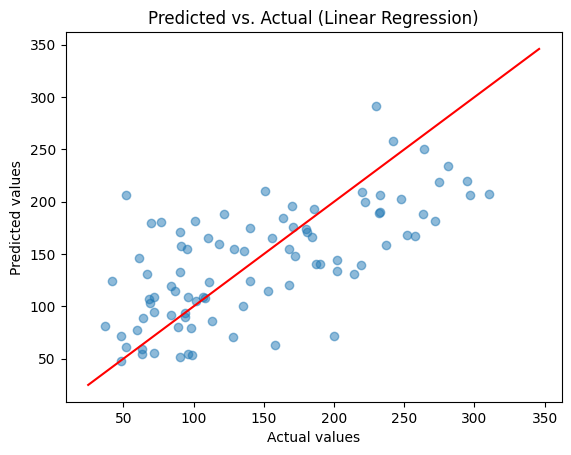

In [14]:
import matplotlib.pyplot as plt

# Plot the predicted vs. the actual values
# Predicted values of the target variable are plotted on the x-axis
# Actual values of the target variable are plotted on the y-axis
# If the model is a good fit, the points should be close to the diagonal line,
# indicating a strong linear relationship between the actual and predicted values

plt.scatter(y_test, y_pred, alpha=0.5 )
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs. Actual (Linear Regression)')
plt.show()

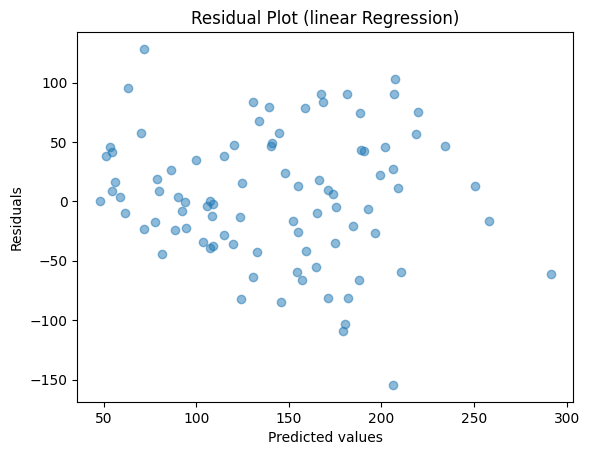

In [16]:
# Plot the residuals
# The residuals are plotted against the predicted values of the target variable.
# If the linear regression model is a good fit for the data,
# the residual plot should show a random scatter of the points around zero
# with no discernable trend.
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot (linear Regression)')
plt.show()